In [1]:
!pip install keras tensorflow

  Using cached tensorflow-2.19.0-cp312-cp312-win_amd64.whl.metadata (4.1 kB)
Using cached tensorflow-2.19.0-cp312-cp312-win_amd64.whl (376.0 MB)


ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\Sakshi1.Rai\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\tensorflow\\_api\\v2\\experimental\\numpy\\__init__.py'
Consider using the `--user` option or check the permissions.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import keras 
import tensorflow as tf

In [4]:
ipl=pd.read_csv("ipl_data.csv")

In [5]:
ipl.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [6]:
df = ipl.drop(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5','mid', 'striker', 'non-striker'], axis =1)

In [8]:
X=df.drop(['total'],axis=1)
y=df['total']

In [9]:
from sklearn.preprocessing import LabelEncoder

venue_encoder = LabelEncoder()
batting_team_encoder = LabelEncoder()
bowling_team_encoder = LabelEncoder()
striker_encoder = LabelEncoder()
bowler_encoder = LabelEncoder()

X['venue'] = venue_encoder.fit_transform(X['venue'])
X['bat_team'] = batting_team_encoder.fit_transform(X['bat_team'])
X['bowl_team'] = bowling_team_encoder.fit_transform(X['bowl_team'])
X['batsman'] = striker_encoder.fit_transform(X['batsman'])
X['bowler'] = bowler_encoder.fit_transform(X['bowler'])

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42)

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [12]:
# Define the neural network model
model = keras.Sequential([
    keras.layers.Input( shape=(X_train_scaled.shape[1],)), 
    keras.layers.Dense(512, activation='relu'), 
    keras.layers.Dense(216, activation='relu'), 
    keras.layers.Dense(1, activation='linear') 
])

huber_loss = tf.keras.losses.Huber(delta=1.0)  
model.compile(optimizer='adam', loss=huber_loss)

In [13]:
model.fit(X_train_scaled, y_train, epochs=50, batch_size=64, validation_data=(X_test_scaled, y_test))

Epoch 1/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 56.5311 - val_loss: 22.0617
Epoch 2/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 22.4618 - val_loss: 21.9988
Epoch 3/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 22.3072 - val_loss: 21.9957
Epoch 4/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 22.2188 - val_loss: 22.5935
Epoch 5/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 22.1049 - val_loss: 21.8696
Epoch 6/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 22.2384 - val_loss: 22.1805
Epoch 7/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 22.1325 - val_loss: 22.0730
Epoch 8/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 22.0673 - val_loss: 22.2168
Epoch 9/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 22.1218 - val_loss: 22.1884
Epoch 10/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 22.2107 - val_loss: 21.8000
Epoch 11/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 22.0255 - val_loss: 21.8119
Epoch 12/50
832/832 ━━━━━━━━━━

<Axes: >

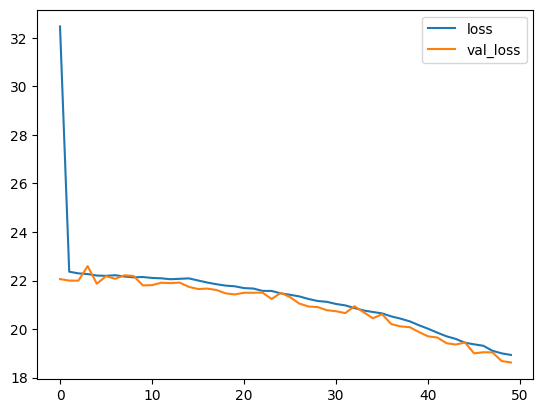

In [14]:
model_losses=pd.DataFrame(model.history.history)
model_losses.plot()

In [15]:
predictions = model.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,predictions)

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


np.float64(19.114793647242543)

In [16]:
import ipywidgets as widgets
from IPython.display import display, clear_output

import warnings
warnings.filterwarnings("ignore")

venue = widgets.Dropdown(options=df['venue'].unique().tolist(),description='Select Venue:')
batting_team = widgets.Dropdown(options =df['bat_team'].unique().tolist(),  description='Select Batting Team:')
bowling_team = widgets.Dropdown(options=df['bowl_team'].unique().tolist(),  description='Select Batting Team:')
striker = widgets.Dropdown(options=df['batsman'].unique().tolist(), description='Select Striker:')
bowler = widgets.Dropdown(options=df['bowler'].unique().tolist(), description='Select Bowler:')

predict_button = widgets.Button(description="Predict Score")

def predict_score(b):
    with output:
        clear_output() 
        
        decoded_venue = venue_encoder.transform([venue.value])
        decoded_batting_team = batting_team_encoder.transform([batting_team.value])
        decoded_bowling_team = bowling_team_encoder.transform([bowling_team.value])
        decoded_striker = striker_encoder.transform([striker.value])
        decoded_bowler = bowler_encoder.transform([bowler.value])


        input = np.array([decoded_venue,  decoded_batting_team, decoded_bowling_team,decoded_striker, decoded_bowler])
        input = input.reshape(1,5)
        input = scaler.transform(input)
        predicted_score = model.predict(input)
        predicted_score = int(predicted_score[0,0])

        print(predicted_score)

In [17]:
predict_button.on_click(predict_score)
output = widgets.Output()
display(venue, batting_team, bowling_team, striker, bowler, predict_button, output)

Dropdown(description='Select Venue:', options=('M Chinnaswamy Stadium', 'Punjab Cricket Association Stadium, M…

Dropdown(description='Select Batting Team:', options=('Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasth…

Dropdown(description='Select Batting Team:', options=('Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi…

Dropdown(description='Select Striker:', options=('SC Ganguly', 'BB McCullum', 'RT Ponting', 'DJ Hussey', 'Moha…

Dropdown(description='Select Bowler:', options=('P Kumar', 'Z Khan', 'AA Noffke', 'JH Kallis', 'SB Joshi', 'CL…

Button(description='Predict Score', style=ButtonStyle())

Output()